# Demo Globygon

### Calculating the center-of-mass for the points

1. Convert each coordinate in RA $(\alpha_{\rm i})$/Dec $(\delta_{\rm i})$ to $x_{\rm i}$, $y_{\rm i}$, and $z_{\rm i}$ Cartesian coordinates: <br>
$$ 
x_{\rm i} = \cos\left( \delta_{\rm i} \right) \cos \left( \alpha_{\rm i} \right), \\ 
y_{\rm i} = \cos\left( \delta_{\rm i}  \right) \sin \left( \alpha_{\rm i} \right), \\
z_{\rm i} = \sin\left( \delta_{\rm i}  \right)
$$
2. Calculate the center-of-mass using the Cartesian coordinates, of which there are $N$ points:
$$
\langle x \rangle = \sum_{\rm i}^{\rm N} x_{\rm i}/N.
$$
3. Convert the $\langle x \rangle$/$\langle y \rangle$/$\langle z \rangle$ back into polar coordinates:
$$
\langle \delta \rangle = \sin^{-1} \left( \langle z \rangle / R \right) \\
\langle \alpha \rangle = \tan^{-1} \left( \langle x \rangle/\langle y \rangle \right), 
$$
where $R$ is given by $R = \sqrt{ \langle x \rangle^2 + \langle y \rangle^2 + \langle z \rangle^2 }$.

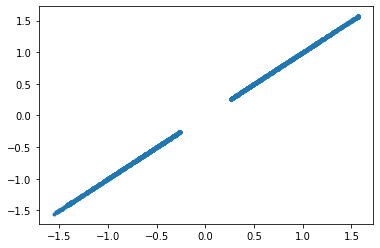

In [55]:
def convert_RADec_to_Cartesian(RA, Dec):
    '''
    RA/Dec should be in radians
    '''
    
    x = np.cos(Dec)*np.cos(RA)
    y = np.cos(Dec)*np.sin(RA)
    z = np.sin(Dec)
    
    return x, y, z

def convert_Cartesian_to_RADec(x, y, z):
    
    # Normalize back to unit sphere
    R = np.sqrt(x**2 + y**2 + z**2)
    
    Dec = np.arcsin(z/R)
    RA = np.arctan2(y/R,x/R)
    # Check to make sure RA is the right data type & make sure we return the angle in the right quadrant
    try:
        RA[RA<0]+=2.*np.pi
    except TypeError:
        if RA<0: RA+=2.*np.pi
        
    return RA, Dec

filename = "hardsurvey.txt"
data = pd.read_csv(filename, comment='#', names=['ID', 'RA', 'DEC'], delimiter=' ')

index = 0
example_RA = data['RA']*degtorad
example_Dec = data['DEC']*degtorad

x, y, z = convert_RADec_to_Cartesian(example_RA, example_Dec)

ra, dec = convert_Cartesian_to_RADec(x, y, z)

plt.plot(example_Dec, dec, marker='.', ls='')

In [56]:
# Which variables should this function take: x, y, and z OR the original RA and Dec?
def center_of_gravity(x,y,z):
    return (x.mean(),y.mean(),z.mean())

cog = center_of_gravity(x,y,z)
print(cog)
cog = convert_Cartesian_to_RADec(cog[0],cog[1],cog[2])
print(cog)

(-0.017493615841984986, 0.004328168892393386, 0.15826412702456244)
(2.899049165492988, 1.4574174838744751)


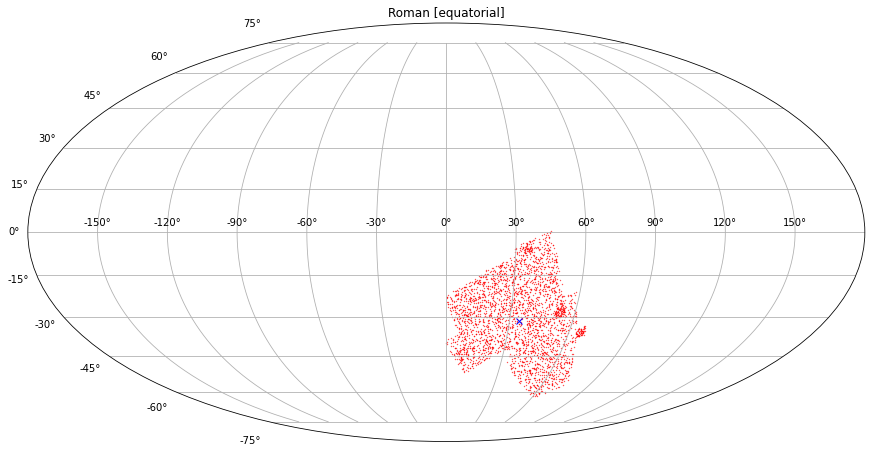

In [53]:
# Plot again to check
fig2 = plt.figure(figsize=[15,15])
ax1 = fig2.add_subplot(111, projection="mollweide")

ax1.scatter((example_RA),example_Dec,s=0.1,c='r') # pointings
ax1.plot(cog[0],cog[1],'bx')

plt.title("Roman [equatorial]")
plt.grid(True)

plt.show()

example_z:  [0. 1.]
cog[2]:  0.5
1.5707963267948966 0.7853981633974484


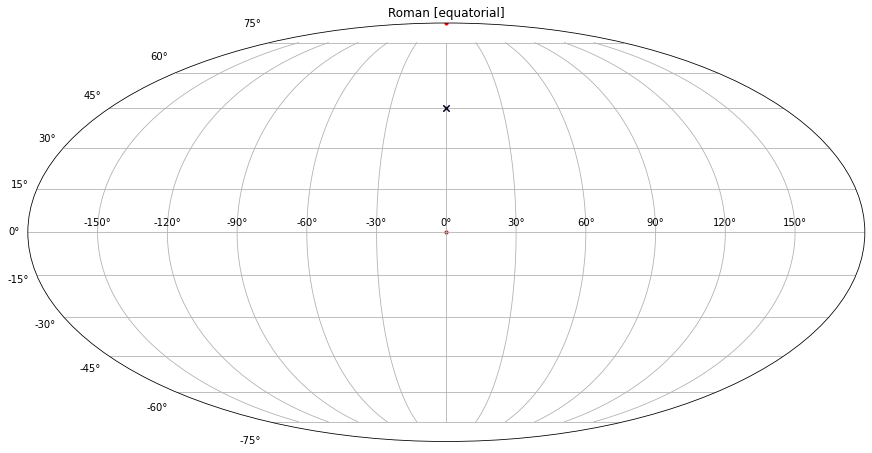

In [57]:
# Plot again to check
fig2 = plt.figure(figsize=[15,15])
ax1 = fig2.add_subplot(111, projection="mollweide")

# example_RA = np.array([-np.pi/4., np.pi/4., 0., 0.,])
example_RA = np.array([0., 0.,])
# example_Dec = np.array([0., 0., -np.pi/8., np.pi/8.]) + np.pi/4.
# example_Dec = np.array([-np.pi/8., np.pi/8.]) + np.pi/4.
example_Dec = np.array([0., np.pi/2.])
example_x, example_y, example_z = convert_RADec_to_Cartesian(example_RA, example_Dec)

# Calculate the Cartesian center-of-gravity
cog = center_of_gravity(example_x, example_y, example_z)

print("example_z: ", example_z)
print("cog[2]: ", cog[2])

# Convert to RA/Dec
cog = convert_Cartesian_to_RADec(cog[0],cog[1],cog[2])

ax1.scatter(example_RA, example_Dec,s=10,c='r') # pointings
ax1.plot(cog[0],cog[1],'bx')
ax1.plot(example_RA,[np.mean(example_Dec), np.mean(example_Dec)],'kx')

print(np.pi/2., cog[1])

plt.title("Roman [equatorial]")
plt.grid(True)

plt.show()